In [36]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [8]:
df.describe

<bound method NDFrame.describe of        show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1                          NaN   

In [40]:
movie_df = df[df['type'] == 'Movie']
print(movie_df.head)


<bound method NDFrame.head of        show_id   type                                    title  \
0     81145628  Movie  Norm of the North: King Sized Adventure   
1     80117401  Movie               Jandino: Whatever it Takes   
4     80125979  Movie                             #realityhigh   
6     70304989  Movie                                 Automata   
7     80164077  Movie       Fabrizio Copano: Solo pienso en mi   
...        ...    ...                                      ...   
5577  80085438  Movie                          Frank and Cindy   
5578  80085439  Movie                          Frank and Cindy   
5579  80011846  Movie                                  Iverson   
5580  80064521  Movie      Jeremy Scott: The People's Designer   
6231  80116008  Movie   Little Baby Bum: Nursery Rhyme Friends   

                             director  \
0            Richard Finn, Tim Maltby   
1                                 NaN   
4                    Fernando Lebrija   
6            

In [42]:
# Filter only rows where type is 'Movie'
movies_df = df[df['type'] == 'Movie']

# Count the number of rows in the filtered DataFrame
num_movies = movies_df.shape[0]

# Print the result
print(f"Number of movies: {num_movies}")


Number of movies: 4265


In [44]:
# Filter only rows where type is 'Movie'
movies_df = df[df['type'] == 'Movie']
rating_counts = movies_df.groupby('rating').size()
print(rating_counts)


rating
G             36
NC-17          2
NR           202
PG           183
PG-13        286
R            506
TV-14       1038
TV-G          80
TV-MA       1348
TV-PG        432
TV-Y          41
TV-Y7         69
TV-Y7-FV      27
UR             7
dtype: int64


In [46]:
import altair as alt
import pandas as pd
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define standard MPAA ratings
mpaa_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17']

# Filter only movies
movies_df = df[df['type'] == 'Movie']

# Keep only MPAA-rated movies
mpaa_movies_df = movies_df[movies_df['rating'].isin(mpaa_ratings)]

# Convert 'rating' column to string (to avoid Altair warnings)
mpaa_movies_df['rating'] = mpaa_movies_df['rating'].astype(str)

# Create a bar chart for the count of each MPAA rating
bar_chart = alt.Chart(mpaa_movies_df).mark_bar().encode(
    x=alt.X('rating:N', title='MPAA Rating'),
    y=alt.Y('count():Q', title='Number of Movies'),
    color=alt.Color('rating:N', legend=None)  # Different colors for categories
).properties(
    title="Distribution of Movies by MPAA Rating"
)

# Display the chart
bar_chart


C:\Users\Other User\AppData\Local\Temp\ipykernel_8240\3472501549.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpaa_movies_df['rating'] = mpaa_movies_df['rating'].astype(str)


alt.Chart(...)

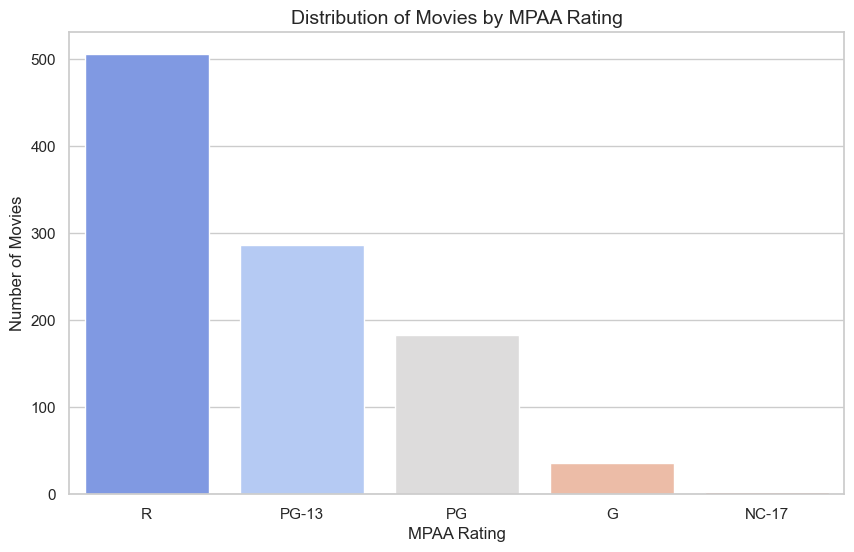

In [52]:
# Set Seaborn style for better aesthetics
import seaborn as sns
sns.set_theme(style="whitegrid")

# Create a count plot for MPAA ratings
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=mpaa_movies_df, x="rating", palette="coolwarm")

# Customize labels and title
ax.set_title("Distribution of Movies by MPAA Rating", fontsize=14)
ax.set_xlabel("MPAA Rating", fontsize=12)
ax.set_ylabel("Number of Movies", fontsize=12)

# Show the plot
plt.show()


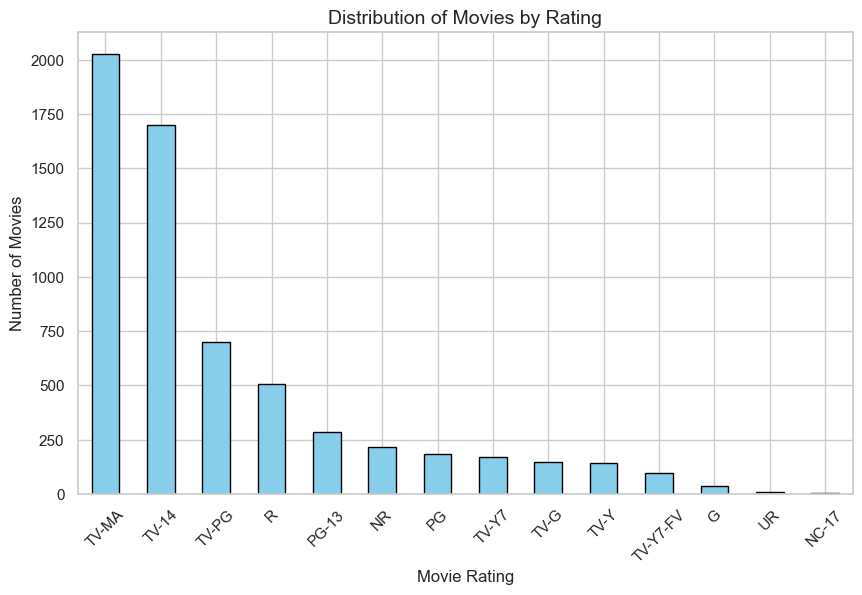

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("netflix_titles.csv")


# Count occurrences of each rating
rating_counts = df["rating"].value_counts()

# Create a bar plot using Pandas' built-in plotting
plt.figure(figsize=(10, 6))  # Adjust figure size
ax = rating_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Customize labels and title
ax.set_title("Distribution of Movies by Rating", fontsize=14)
ax.set_xlabel("Movie Rating", fontsize=12)
ax.set_ylabel("Number of Movies", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

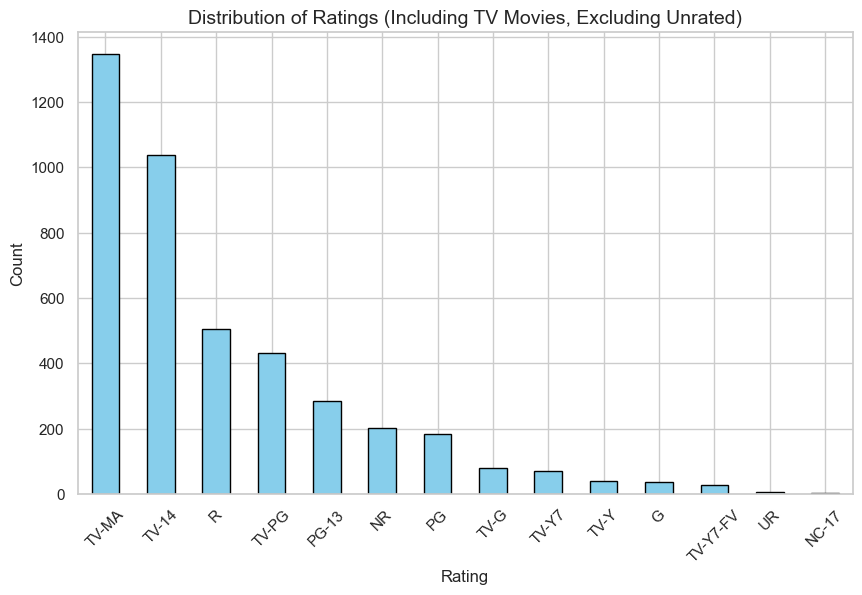

In [58]:
# Filter to include movies and made-for-TV movies, excluding unrated movies
filtered_df = df[(df["type"] == "Movie") | (df["type"] == "Made for TV Movie")]

# Count occurrences of each rating
rating_counts = filtered_df["rating"].value_counts()

# Plot the ratings count
plt.figure(figsize=(10, 6))
rating_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Ratings (Including TV Movies, Excluding Unrated)", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


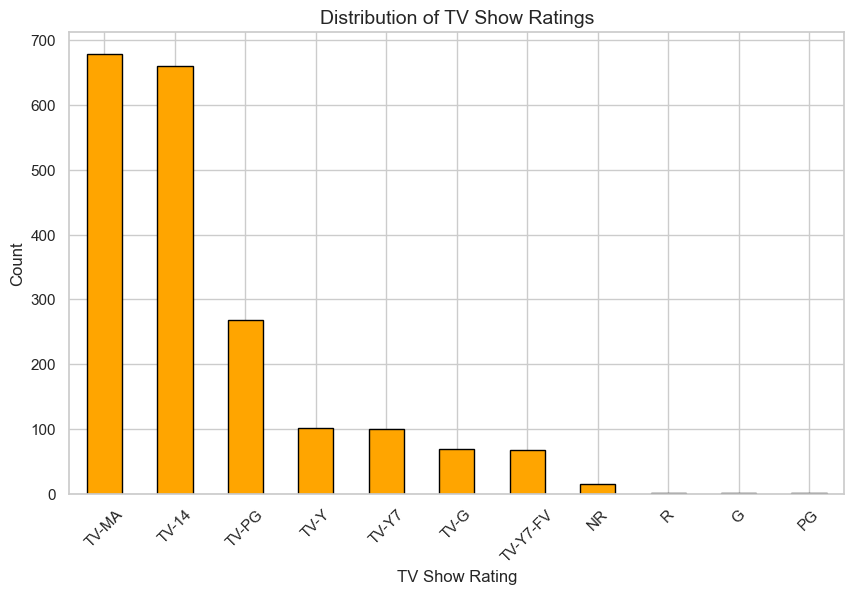

In [60]:
# Filter dataset to include only TV Shows
tv_shows_df = df[df["type"] == "TV Show"]

# Count occurrences of each rating for TV shows
tv_rating_counts = tv_shows_df["rating"].value_counts()

# Plot the ratings count for TV Shows
plt.figure(figsize=(10, 6))
tv_rating_counts.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Distribution of TV Show Ratings", fontsize=14)
plt.xlabel("TV Show Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


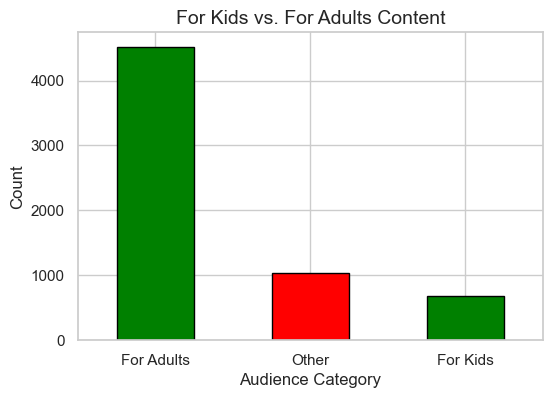

In [62]:
# Create a new column mapping ratings to categories
def categorize_rating(rating):
    kids_ratings = ["G", "PG", "TV-Y", "TV-Y7", "TV-G"]
    adult_ratings = ["PG-13", "R", "TV-14", "TV-MA"]
    
    if rating in kids_ratings:
        return "For Kids"
    elif rating in adult_ratings:
        return "For Adults"
    else:
        return "Other"

df["audience_category"] = df["rating"].apply(categorize_rating)

# Count occurrences of each category
category_counts = df["audience_category"].value_counts()

# Plot "For Kids" vs "For Adults"
plt.figure(figsize=(6, 4))
category_counts.plot(kind="bar", color=["green", "red"], edgecolor="black")
plt.title("For Kids vs. For Adults Content", fontsize=14)
plt.xlabel("Audience Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()
